In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
# loading .py functions 
# %run ../src/multiplot.py
# %run ../src/multiplot_norm.py
# %run ../src/multi_boxplot.py
import sys
sys.path.append("../src")
from multi_boxplot import multiboxplot
from multiplot import multiplot
from multiplot_norm import multiplot_norm


Podstawy notebooka, nazywa się jupyter notebook
dzieli się na chunki kodu i komentarze,
każdy chunk odpala się osobno. 
I trzyma zmienne 
jeśli chcecie to możecie wszystko od zera odpalić ponownie
Polecam korzystać z venv ale to już jak wolicie, venv to lokalny interpreter pythona to nie powinien być prioryted by to ogarnąc

In [2]:
# files .ipynb see the path from their prespective for this example working dir is src/
# but .py see the working dir as the path where you run the file, usulay root of the project
train = pd.read_csv("../data/titanic/raw/train.csv") 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# we can see that ticket should be and int but is it worth is to convert it to int, is it trurly a number?
# we can see that accept that the data format is correct
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# rows, col
train.shape

(891, 12)

In [8]:
# What columns will give as any value, or what column will be unimportant for sure
# I bet we can drop the name without loss
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# handling missing data
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# I have no idea what is the cabin and dataset description does not help so i will remove it but at the end 
# of the first section as they might be useful in other way 
# train.drop(columns="Cabin", inplace=True)
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


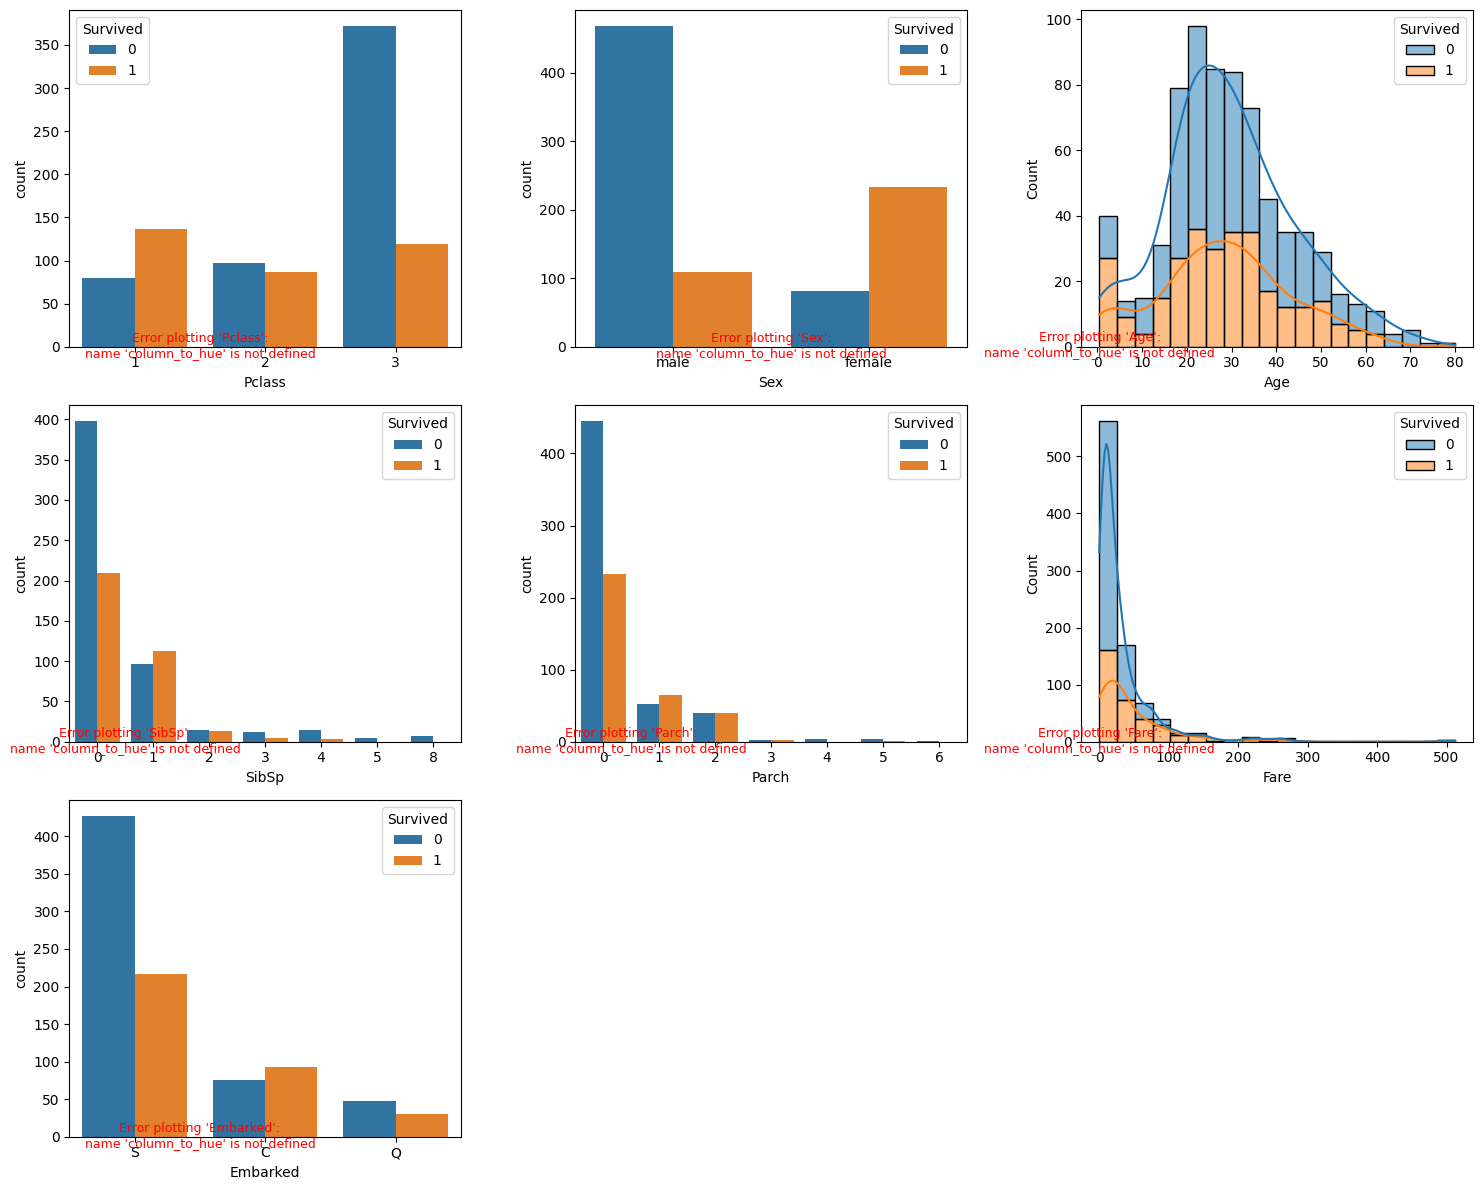

In [12]:
try:
    multiplot(train, "Survived", ["Name","Cabin", "PassengerId", "Ticket"])
except Exception as e:
    print(str(e))

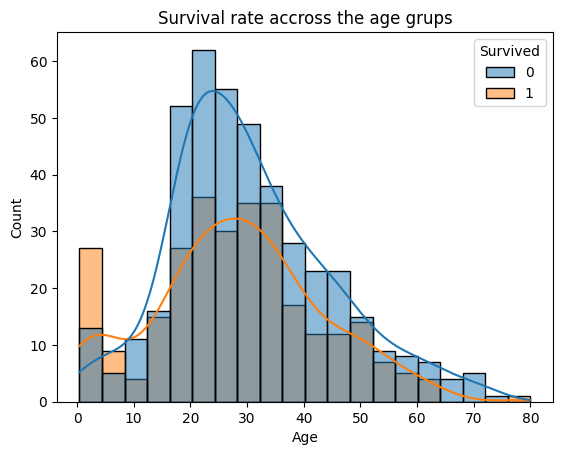

In [13]:
# we need to handle the missing data within the age, i suppose there will be the diffrence in the survival rate accross
# the age grups and the Pclass, and sex thats way i decide to investigate that
sns.histplot(data=train, x="Age", hue="Survived", bins=20, kde=True)
plt.title("Survival rate accross the age grups")
plt.show()

# we can observe that it varies significantly

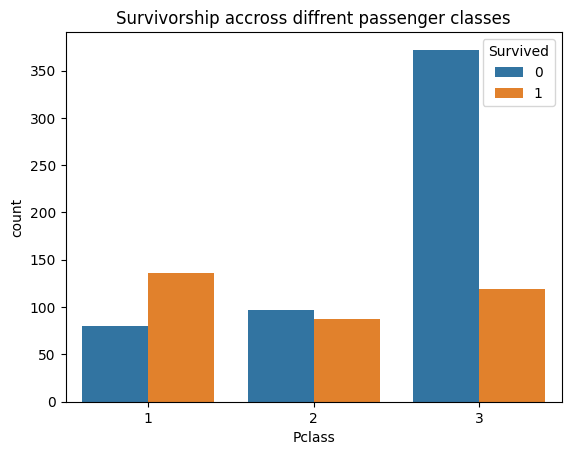

In [14]:
sns.countplot(data=train, x="Pclass", hue="Survived")
plt.title("Survivorship accross diffrent passenger classes")
plt.show()
# we can obesrve that there are significant diffrences

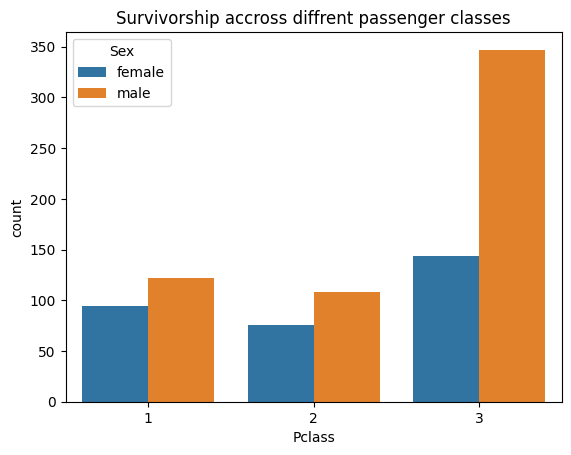

In [15]:
sns.countplot(data=train, x="Pclass", hue="Sex")
plt.title("Survivorship accross diffrent passenger classes")
plt.show()
# we can observe that there is a diffrence in survivorship accross diffrent genders 

In [16]:
print(train["Survived"].value_counts())
survived_ratio = (train["Survived"] == 1).mean()
print(survived_ratio)


Survived
0    549
1    342
Name: count, dtype: int64
0.3838383838383838


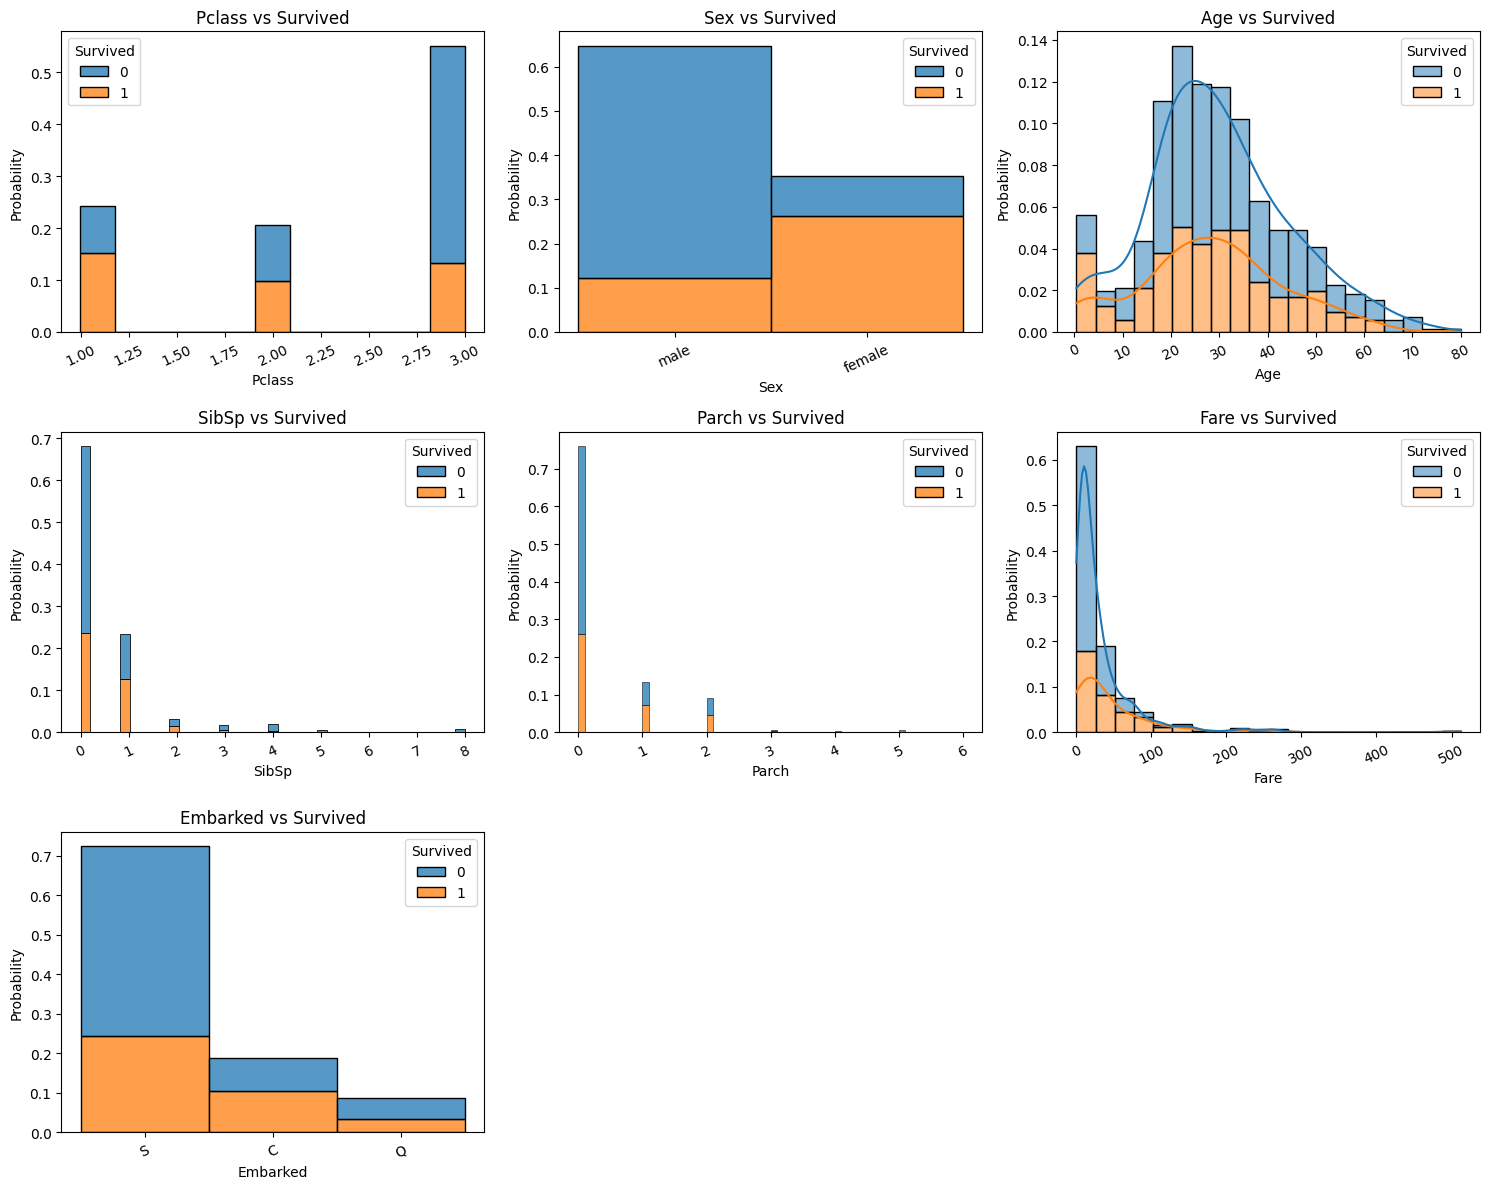

In [17]:
multiplot_norm(train, "Survived", ["Name","Cabin", "PassengerId", "Ticket"])
# Normalized veriosion as we have inbalanced set

In [18]:
# base on that analysis we can quite safly assume that 
# if we will aproximate age base on these 2 factors it will not change our analysis that much

# this can be done simpler, transform just accept the functin

# train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

def f1(x):
    return x.fillna(x.median())

train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].transform(f1)


print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
# we can create buckets for age grups couse if we would aproximete by gruping 
# all variables we would most likely get similar age as 2 or 3 samples.
def devide_age(df):
    df['AgeGroup'] = pd.cut(
        df['Age'],
        bins=[0, 
            12, 
            20, 
            40,# can use quantiles, but for age it would be kinda weird as we precive difrennces diffrently accross difrent age gups 
            60, 
            df["Age"].max()],
        
        labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
    )
# we can see that df are mutable and we can pass them too the functions
devide_age(train)

In [20]:
# it is nothing out of the ordinary, 
# as there are only two rows i will remove it
print(train[train.isna().any(axis=1)])

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [21]:
train.dropna(inplace=True)

In [22]:
# Are there duplicates
print(train.duplicated().sum())


0


In [23]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
AgeGroup       category
dtype: object

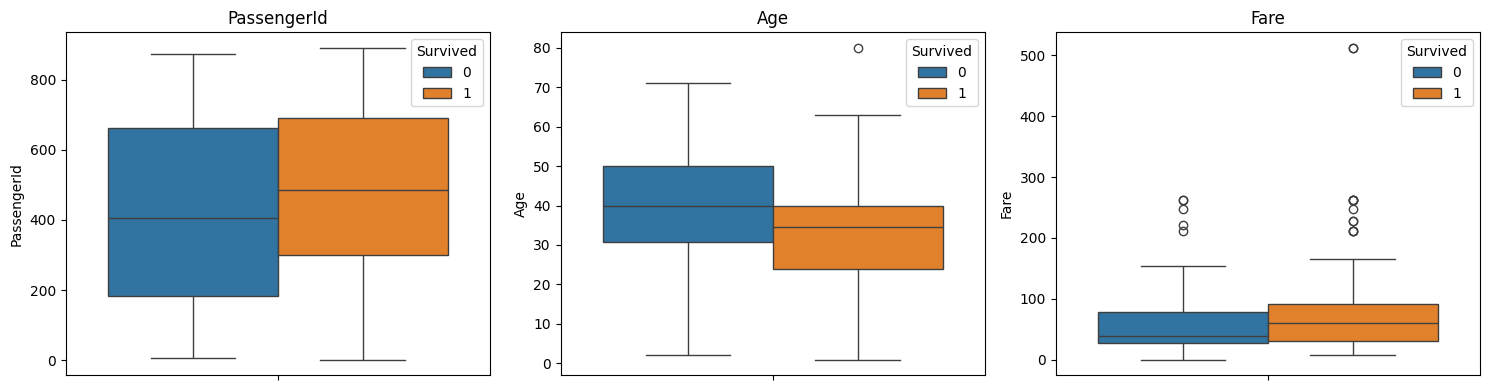

In [24]:
# Outliers
# we can see that iqr lines match the boxplot range as they are the same thing and the dots are outliers
outliers = multiboxplot(train, cols_to_exclude=["Survived"], hue="Survived")

In [25]:
# we can analyze our outilers

for l in outliers:
    print(l[0])
    print(l[1].shape[0])
    print(l[1].head())

PassengerId
0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, AgeGroup]
Index: []
Age
1
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked AgeGroup  
630  male  80.0      0      0  27042  30.0   A23        S   Senior  
Fare
17
     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
299          300         1       1   
311          312         1       1   

                                                Name     Sex   Age  SibSp  \
27                    Fortune, Mr. Charles Alexander    male  19.0      3   
88                        Fortune, Miss. Mabel Helen  female  23.0      3   
118                         Baxter, Mr. Quigg Edmond    male  24.0      0   
299  B

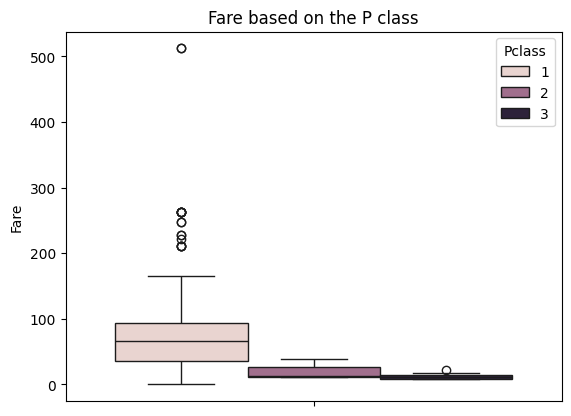

In [26]:
# we can observe that some values are outside of normal range but it is possibile
# it is not a bug as we dont have negative values for fare and age, and age below 90 is possible
# in the fare section we can see that the outliers are the people in the firts class
sns.boxplot(data=train, y="Fare",hue="Pclass")
plt.title("Fare based on the P class")
plt.show()

In [27]:
def get_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr_const = 1.5
    iqr = q3 - q1
    lower_bound = q1 - iqr_const * iqr
    upper_bound = q3 + iqr_const * iqr
    # this one return error as it is series comparison, | is a element wise comparison
    #return ( x < lower_bound) or (x > upper_bound) 
    return ( x < lower_bound) | (x > upper_bound) 

outliers_grouped_by_pclass = train[train.groupby("Pclass")["Fare"].transform(get_outliers)]

In [28]:
# we get outliers where Pclass == 1 later we sort by the Fare in decresing order, and show 5 first values
outliers_grouped_by_pclass[outliers_grouped_by_pclass["Pclass"] == 1].sort_values(by="Fare", ascending=False).head()
# some random rich people got prepium ticker they can stay
# I am done with the first phase so i will remove the name and cabin
 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Adult
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Teen
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Adult
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Adult


In [29]:
train.drop(columns="Cabin", inplace=True)
train.drop(columns=["Name"], inplace=True)
print(train.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64


In [30]:
# Feature engineering
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# i will create new feature fammilly, do not know if it will be of any good but i want to show the idea,
# It generaly means that we create new columns base on existing data

train["Familly"] = train["SibSp"] + train["Parch"] + 1 # we need to count the inividual itself


print(train["Familly"].min())
print(train["Familly"].describe())

1
count    202.000000
mean       1.886139
std        1.084447
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: Familly, dtype: float64


In [31]:
# Now we will create fammily category
def add_fammily_category(df):
    familly_labels = ["alone", "small", "medium", "large"]
    # i will use dots as i want to make devision anambigous 
    familly_bins = [0, 1.1, 2.1, 4.1, np.inf]
    df["FamillyGroup"] = pd.cut(
        df["Familly"],
        bins = familly_bins,
        labels=familly_labels
    )

add_fammily_category(train)
# we created 2 new categories, fammily, and familly category
# we should only have one of them as having two is pointless
print(train)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch    Ticket  \
1              2         1       1  female  38.0      1      0  PC 17599   
3              4         1       1  female  35.0      1      0    113803   
6              7         0       1    male  54.0      0      0     17463   
10            11         1       3  female   4.0      1      1   PP 9549   
11            12         1       1  female  58.0      0      0    113783   
..           ...       ...     ...     ...   ...    ...    ...       ...   
871          872         1       1  female  47.0      1      1     11751   
872          873         0       1    male  33.0      0      0       695   
879          880         1       1  female  56.0      0      1     11767   
887          888         1       1  female  19.0      0      0    112053   
889          890         1       1    male  26.0      0      0    111369   

        Fare Embarked     AgeGroup  Familly FamillyGroup  
1    71.2833        C       

In [32]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'Familly', 'FamillyGroup'],
      dtype='object')

In [33]:
# I will no longer need many columns, i will remove redundant data
cols_to_drop=["PassengerId", "SibSp", "Parch", "Ticket", "AgeGroup", "FamillyGroup"]
# for the tree models it would be ebtter to keep the AgeGroup and FamillyGroup, but for others 
# we can be more precise
# i know i created Familly grup but i want to higlight how we can do that
train.drop(columns=cols_to_drop, inplace=True)

print(train.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familly'], dtype='object')


In [34]:
# i will use one hot encoding for emparked data as it is not any hierarchy it is just 
# where given person embarked into the ship, i will keep that column becouse there where diffrences in
# survivorship accross diffrent cities
print(train["Embarked"].value_counts())
train = pd.get_dummies(train, columns=["Embarked"])
print(train.head())


Embarked
S    129
C     69
Q      4
Name: count, dtype: int64
    Survived  Pclass     Sex   Age     Fare  Familly  Embarked_C  Embarked_Q  \
1          1       1  female  38.0  71.2833        2        True       False   
3          1       1  female  35.0  53.1000        2       False       False   
6          0       1    male  54.0  51.8625        1       False       False   
10         1       3  female   4.0  16.7000        3       False       False   
11         1       1  female  58.0  26.5500        1       False       False   

    Embarked_S  
1        False  
3         True  
6         True  
10        True  
11        True  


In [35]:
# not we have to map the values into the numbers, so mainly sex column
# we have to do that as the values might be Male male m ...
train["Sex"].value_counts()

Sex
male      107
female     95
Name: count, dtype: int64

In [36]:
sex_map = {"male": 1, "female": 2}
train["Sex"] = train["Sex"].map(sex_map)
print(train.head())

    Survived  Pclass  Sex   Age     Fare  Familly  Embarked_C  Embarked_Q  \
1          1       1    2  38.0  71.2833        2        True       False   
3          1       1    2  35.0  53.1000        2       False       False   
6          0       1    1  54.0  51.8625        1       False       False   
10         1       3    2   4.0  16.7000        3       False       False   
11         1       1    2  58.0  26.5500        1       False       False   

    Embarked_S  
1        False  
3         True  
6         True  
10        True  
11        True  


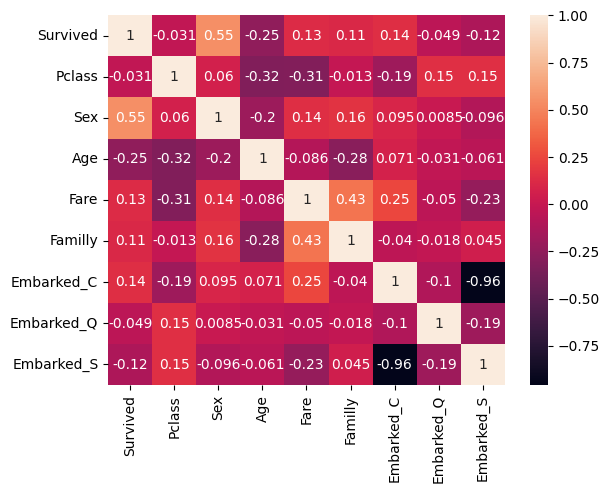

In [37]:
sns.heatmap(train.corr(), annot=True)
plt.show()

In [38]:
# devision into tranning and validdating
Y = train["Survived"]
train.drop("Survived", axis=1, inplace=True)
X = train

In [39]:
# Now we can do feature scaling 
columns_to_show = X.columns 
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(pd.DataFrame(X, columns=columns_to_show))

       Pclass       Sex       Age      Fare   Familly  Embarked_C  Embarked_Q  \
0   -0.375823  1.061280  0.151730 -0.064633  0.105256    1.388357   -0.142134   
1   -0.375823  1.061280 -0.048996 -0.308460  0.105256   -0.720276   -0.142134   
2   -0.375823 -0.942258  1.222265 -0.325054 -0.819164   -0.720276   -0.142134   
3    3.419989  1.061280 -2.123157 -0.796561  1.029675   -0.720276   -0.142134   
4   -0.375823  1.061280  1.489899 -0.664479 -0.819164   -0.720276   -0.142134   
..        ...       ...       ...       ...       ...         ...         ...   
197 -0.375823  1.061280  0.753906 -0.315779  1.029675   -0.720276   -0.142134   
198 -0.375823 -0.942258 -0.182812 -0.953451 -0.819164   -0.720276   -0.142134   
199 -0.375823  1.061280  1.356082  0.094603  0.105256    1.388357   -0.142134   
200 -0.375823  1.061280 -1.119531 -0.618217 -0.819164   -0.720276   -0.142134   
201 -0.375823 -0.942258 -0.651171 -0.618217 -0.819164    1.388357   -0.142134   

     Embarked_S  
0     -1.

In [40]:
print(Y.head())

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64


# Dodatkowe to już nie dotyczy preprocessingu

![Precision](../images/Precision.png)


![Recoll](../images/Recoll.png)



![F1](../images/F1.png)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(
    X, Y,
    test_size=0.2,      # 20% for validation
    random_state=42,    # reproducible split
    stratify=Y          # keeps class balance
)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (161, 8)
Validation set shape: (41, 8)


In [42]:
# Basic model preparation
# dont remember I did not spend to much time on the modeling, so thesa are only the basics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print("\nDetailed classification ")
print(classification_report(y_val, y_pred_log))

Logistic Regression Accuracy: 0.7317073170731707

Detailed classification 
              precision    recall  f1-score   support

           0       0.59      0.71      0.65        14
           1       0.83      0.74      0.78        27

    accuracy                           0.73        41
   macro avg       0.71      0.73      0.71        41
weighted avg       0.75      0.73      0.74        41



In [44]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))
print("\nDetailed classification ")
print(classification_report(y_val, y_pred_tree))

Decision Tree Accuracy: 0.8292682926829268

Detailed classification 
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.83      0.93      0.88        27

    accuracy                           0.83        41
   macro avg       0.83      0.78      0.80        41
weighted avg       0.83      0.83      0.82        41



In [45]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    ccp_alpha=0.005,       # prune individual trees
    max_depth=None
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest (pruned) Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nDetailed classification ")
print(classification_report(y_val, y_pred_rf))

Random Forest (pruned) Accuracy: 0.8048780487804879

Detailed classification 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.85      0.85      0.85        27

    accuracy                           0.80        41
   macro avg       0.78      0.78      0.78        41
weighted avg       0.80      0.80      0.80        41



In [46]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print("\nDetailed classification ")
print(classification_report(y_val, y_pred_gb))

Gradient Boosting Accuracy: 0.8048780487804879

Detailed classification 
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.81      0.93      0.86        27

    accuracy                           0.80        41
   macro avg       0.80      0.75      0.76        41
weighted avg       0.80      0.80      0.80        41



In [47]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))
print("\nDetailed classification ")
print(classification_report(y_val, y_pred_svm))

SVM Accuracy: 0.7073170731707317

Detailed classification 
              precision    recall  f1-score   support

           0       0.56      0.64      0.60        14
           1       0.80      0.74      0.77        27

    accuracy                           0.71        41
   macro avg       0.68      0.69      0.68        41
weighted avg       0.72      0.71      0.71        41



In [48]:
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                         solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_val)
print("Neural Network Accuracy:", accuracy_score(y_val, y_pred_nn))
print("\nDetailed classification ")
print(classification_report(y_val, y_pred_nn))

Neural Network Accuracy: 0.7560975609756098

Detailed classification 
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.79      0.85      0.82        27

    accuracy                           0.76        41
   macro avg       0.73      0.71      0.72        41
weighted avg       0.75      0.76      0.75        41



/media/mariusz/Projects/Code/gradient/preprocessing/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
